# Question1: If patients from racial minority groups wait longer.

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import scipy.stats as st

In [ ]:
ed2013 = pd.read_stata('https://ftp.cdc.gov/pub/health_statistics/nchs/dataset_documentation/nhamcs/stata/ED2013-stata.dta', convert_categoricals=False, convert_missing=True)

In [ ]:
# Select relevant columns
data_subset = ed2013[['RACERETH', 'WAITTIME']]

In [ ]:
# Description of column [RACERETH] and [WAITTIME]:
# [RACERETH] RACE/ETHNICITY (WITH MISSING DATA IMPUTED)
# 1 = Non-Hispanic White
# 2 = Non-Hispanic Black
# 3 = Hispanic
# 4 = Non-Hispanic Other
# [WAITTIME] WAITING TIME TO SEE MD/DO/PA/NP (minutes)
# -9 = Blank
# -7 = Not applicable (Not seen by MD/DO/PA/NP)
# 0-1227 (reported range)

In [ ]:
# Filter out rows with waiting time less than 0
data_subset = data_subset[data_subset['WAITTIME'] >= 0]
print(data_subset)

       RACERETH  WAITTIME
0             3        33
1             3       109
2             3        84
3             3       159
4             3       114
...         ...       ...
24772         1         0
24773         2         0
24774         1         0
24775         3         0
24776         1        45

[20469 rows x 2 columns]


In [ ]:
# Create separate series for each racial/ethnic group
group_1 = data_subset[data_subset['RACERETH'] == 1]['WAITTIME']
group_2 = data_subset[data_subset['RACERETH'] == 2]['WAITTIME']
group_3 = data_subset[data_subset['RACERETH'] == 3]['WAITTIME']
group_4 = data_subset[data_subset['RACERETH'] == 4]['WAITTIME']

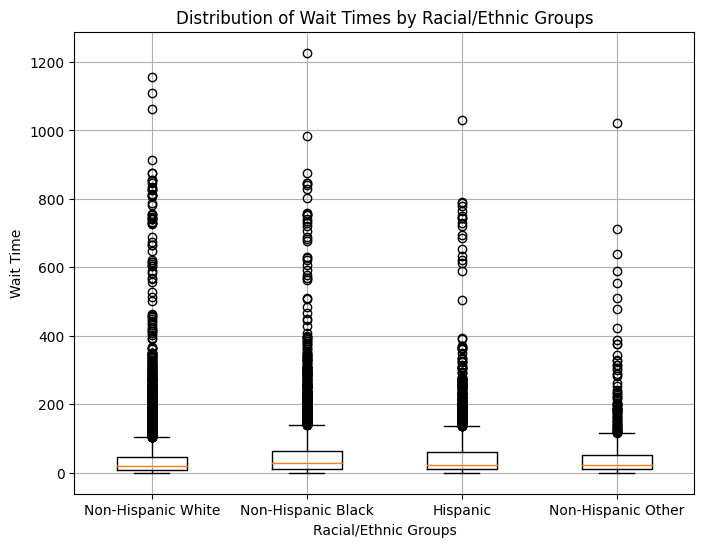

In [ ]:
# The boxplot of wait time of 4 groups

data = [group_1, group_2, group_3, group_4]
plt.figure(figsize=(8, 6))
plt.boxplot(data)
plt.xlabel('Racial/Ethnic Groups')
plt.ylabel('Wait Time')
plt.title('Distribution of Wait Times by Racial/Ethnic Groups')
plt.xticks([1, 2, 3, 4], ['Non-Hispanic White', 'Non-Hispanic Black', 'Hispanic', 'Non-Hispanic Other'])
plt.grid(True)
plt.show()

In [ ]:
# Use the IQR (interquartile range) method to clean out outliers
import pandas as pd
import numpy as np

# Define a function to clean out outliers
def remove_outliers(data):
    quartiles = np.percentile(data, [25, 75])
    IQR = quartiles[1] - quartiles[0]
    lower_limit = quartiles[0] - 1.5 * IQR
    upper_limit = quartiles[1] + 1.5 * IQR
    return data[(data >= lower_limit) & (data <= upper_limit)]

# Clean outliers in each group and store them as a Series with the same type as the original data
cleaned_group_1 = pd.Series(remove_outliers(group_1))
cleaned_group_2 = pd.Series(remove_outliers(group_2))
cleaned_group_3 = pd.Series(remove_outliers(group_3))
cleaned_group_4 = pd.Series(remove_outliers(group_4))

In [ ]:
# Create a new dataframe for cleaned data
cleaned_data_subset = pd.DataFrame({
    'RACERETH': [1] * len(cleaned_group_1) + [2] * len(cleaned_group_2) +
                [3] * len(cleaned_group_3) + [4] * len(cleaned_group_4),
    'WAITTIME': pd.concat([cleaned_group_1, cleaned_group_2, cleaned_group_3, cleaned_group_4])
})
cleaned_data_subset.reset_index(drop=True, inplace=True)
print(cleaned_data_subset)

       RACERETH  WAITTIME
0             1        85
1             1        10
2             1        69
3             1        24
4             1        54
...         ...       ...
18717         4        81
18718         4        25
18719         4        21
18720         4        30
18721         4        14

[18722 rows x 2 columns]


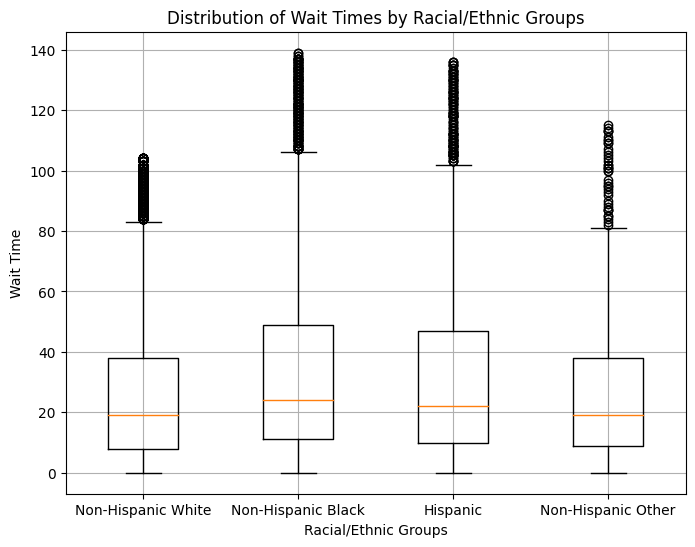

In [ ]:
# The new boxplot of wait time of 4 groups (without outliers)
data = [cleaned_group_1, cleaned_group_2, cleaned_group_3, cleaned_group_4]
plt.figure(figsize=(8, 6))
plt.boxplot(data)
plt.xlabel('Racial/Ethnic Groups')
plt.ylabel('Wait Time')
plt.title('Distribution of Wait Times by Racial/Ethnic Groups')
plt.xticks([1, 2, 3, 4], ['Non-Hispanic White', 'Non-Hispanic Black', 'Hispanic', 'Non-Hispanic Other'])
plt.grid(True)
plt.show()

In [ ]:
# Use Kolmogorov–Smirnov Test to test whether each group conforms to the normal distribution

from scipy import stats

data = cleaned_group_1
stat, p = stats.kstest(data, 'norm')
alpha = 0.05  # Set significance level

if p > alpha:
    print("cleaned_group_1 data conforms to normal distribution")
else:
    print("cleaned_group_1 data does not conform to normal distribution")

data = cleaned_group_2
stat, p = stats.kstest(data, 'norm')
alpha = 0.05  # Set significance level

if p > alpha:
    print("cleaned_group_2 data conforms to normal distribution")
else:
    print("cleaned_group_2 data does not conform to normal distribution")

data = cleaned_group_3
stat, p = stats.kstest(data, 'norm')
alpha = 0.05  # Set significance level

if p > alpha:
    print("cleaned_group_3 data conforms to normal distribution")
else:
    print("cleaned_group_3 data does not conform to normal distribution")

data = cleaned_group_4
stat, p = stats.kstest(data, 'norm')
alpha = 0.05  # Set significance level

if p > alpha:
    print("cleaned_group_4 data conforms to normal distribution")
else:
    print("cleaned_group_4 data does not conform to normal distribution")

cleaned_group_1 data does not conform to normal distribution
cleaned_group_2 data does not conform to normal distribution
cleaned_group_3 data does not conform to normal distribution
cleaned_group_4 data does not conform to normal distribution


In [ ]:
# Use Levene's test to test the homogeneity of variance

from scipy.stats import levene
levene_statistic, levene_p_value = levene(cleaned_group_1, cleaned_group_2, cleaned_group_3, cleaned_group_4)
print(f"Levene Statistic: {levene_statistic}")
print(f"P-value: {levene_p_value}")

Levene Statistic: 101.63103173056587
P-value: 2.9422085215436778e-65


In [ ]:
!pip install pingouin
import pingouin as pg

In [ ]:
# Use Welch's ANOVA to perform  mean comparison
welch_anova = pg.welch_anova(dv='WAITTIME', between='RACERETH', data=cleaned_data_subset)
print(welch_anova)

     Source  ddof1        ddof2          F         p-unc       np2
0  RACERETH      3  2595.584268  98.320345  2.819705e-60  0.017599


In [ ]:
# Use Games-Howell pairwise test to determine which groups have significant differences
posthoc = pg.pairwise_gameshowell(dv='WAITTIME', between='RACERETH', data=cleaned_data_subset)
posthoc

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,26.595407,34.755694,-8.160287,0.537430,-15.183920,6384.571618,0.000000e+00,-0.307521
1,1,3,26.595407,33.067903,-6.472497,0.631373,-10.251462,3773.387839,1.924239e-12,-0.251673
2,1,4,26.595407,27.671406,-1.075999,1.065241,-1.010099,695.204781,7.435737e-01,-0.044612
3,2,3,34.755694,33.067903,1.687790,0.762686,2.212957,6189.737817,1.197817e-01,0.053085
4,2,4,34.755694,27.671406,7.084288,1.147953,6.171234,931.287905,6.053673e-09,0.225991
5,3,4,33.067903,27.671406,5.396497,1.194821,4.516573,1076.183466,4.126881e-05,0.176645


In [ ]:
# The results of the table show that white people do have shorter waiting times than other races.

# Question 2: If wait times increase during holiday periods.

In [ ]:
import pandas as pd
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ed2013 = pd.read_stata('https://ftp.cdc.gov/pub/health_statistics/nchs/dataset_documentation/nhamcs/stata/ED2013-stata.dta', convert_categoricals=False, convert_missing=True)

df = pd.DataFrame(ed2013)

# Data Cleaning
# Remove rows with negative WAITTIME values
df = df[df['WAITTIME'] > 0]

# Function to categorize days as workdays or holidays
def categorize_day(row):
    if row['VDAYR'] in [1, 7]:  # Sunday or Saturday
        return 'Holiday'
    else:
        return 'Weekday'

# Apply the categorization function to create a new column 'day_type'
df['day_type'] = df.apply(categorize_day, axis=1)

# Group by 'day_type' and calculate the mean waiting time for each category
result = df.groupby('day_type')['WAITTIME'].mean()

# Print the result
print(result)
# Inspect the data
print(df.head())

day_type
Holiday    42.934496
Weekday    49.108489
Name: WAITTIME, dtype: float64
   VMONTH  VDAYR ARRTIME  WAITTIME  LOV  AGE  AGER  AGEDAYS  RESIDNCE  SEX  \
0       1      3    0647        33   58   46     4       -7         1    2   
1       1      3    1841       109  150   56     4       -7         1    2   
2       1      3    1333        84  198   37     3       -7         1    2   
3       1      3    1401       159  276    7     1       -7         1    1   
4       1      4    1947       114  248   53     4       -7         1    1   

   ...  RX12V3C2  RX12V3C3  RX12V3C4  SETTYPE  YEAR   CSTRATM   CPSUM  PATWT  \
0  ...                                      3  2013  20113201  100020   2945   
1  ...                                      3  2013  20113201  100020   2945   
2  ...                                      3  2013  20113201  100020   2945   
3  ...                                      3  2013  20113201  100020   2945   
4  ...                                      3  20

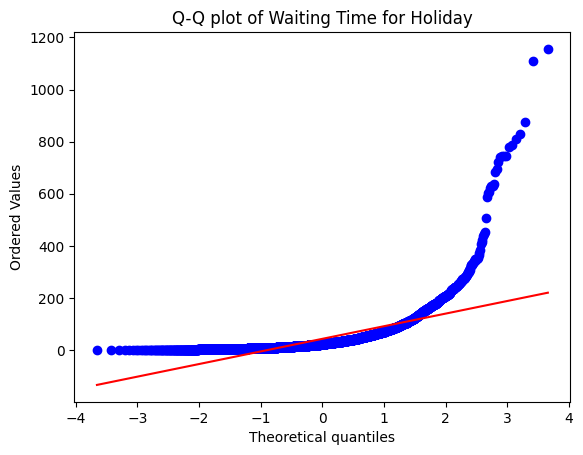

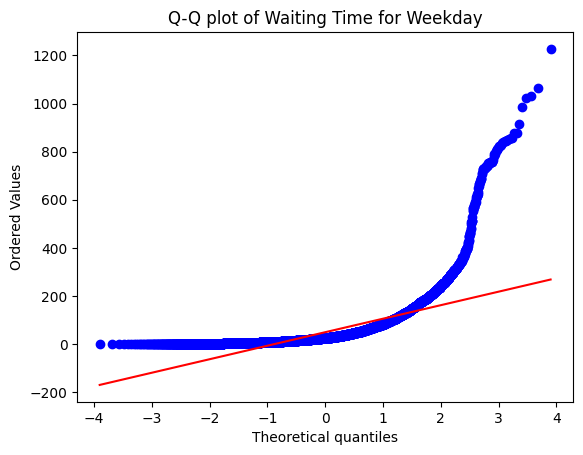

In [ ]:
# Identify Weekends as Holidays
# In this case, consider Saturday and Sunday as weekends
def is_holiday(row):
    return (row['VDAYR'] == 1 or row['VDAYR'] == 7)

# Create a New Column for Holidays
df['IsHoliday'] = df.apply(is_holiday, axis=1)

# Q-Q plot to check for normality
for day_type, group in df.groupby('day_type'):
    stats.probplot(group['WAITTIME'], dist="norm", plot=plt)
    plt.title(f'Q-Q plot of Waiting Time for {day_type}')
    plt.show()

In [ ]:
# Separate data into two groups: Holiday and Weekday
holiday_data = df[df['day_type'] == 'Holiday']['WAITTIME']
working_day_data = df[df['day_type'] == 'Weekday']['WAITTIME']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(holiday_data, working_day_data)

# Print the results
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in waiting time.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in waiting time.")

Mann-Whitney U statistic: 36913410.0
P-value: 9.981815534349807e-08
Reject the null hypothesis. There is a significant difference in waiting time.


In [ ]:
# Calculate effect size (z-score)
z_score = (statistic - (len(working_day_data) * len(holiday_data) / 2)) / (
    (len(working_day_data) * len(holiday_data) * (len(working_day_data) + len(holiday_data) + 1) / 12)**0.5
)

# Print effect size (z-score)
print("Effect size (z-score):", z_score)

Effect size (z-score): -5.3263568563609445


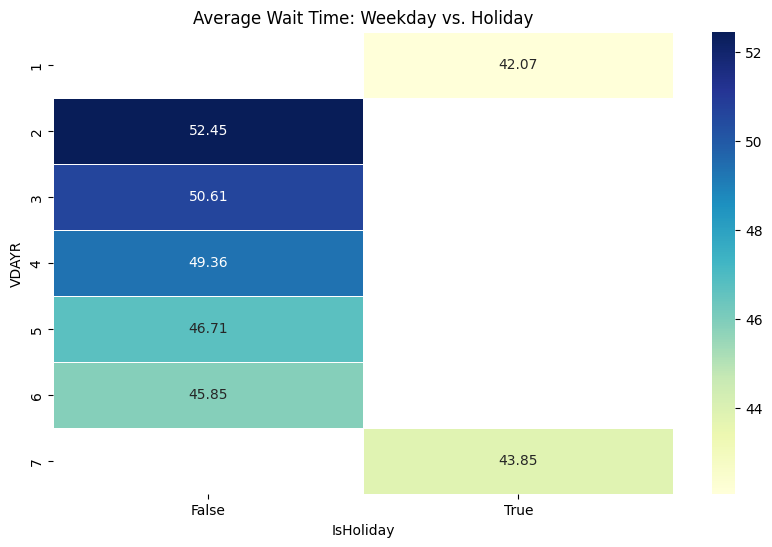

In [ ]:
# Visualization
# Create a heat map data box
heatmap_data = df.pivot_table(index='VDAYR', columns='IsHoliday', values='WAITTIME', aggfunc='mean')

# Draw a heat map
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title("Average Wait Time: Weekday vs. Holiday")
plt.show()

<Figure size 1200x600 with 0 Axes>

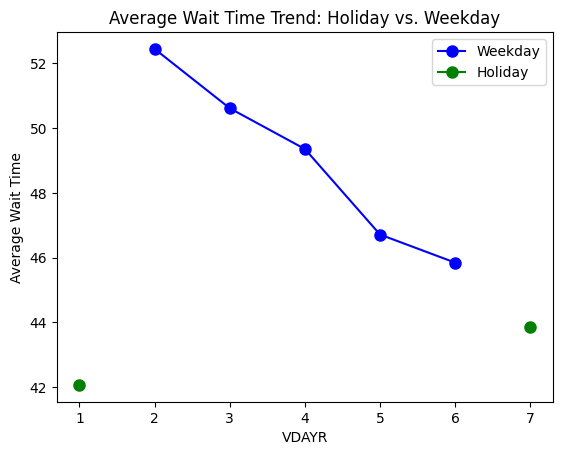

In [ ]:
# Calculate average waiting time by date
average_wait_time_by_date = df.groupby(['VDAYR', 'IsHoliday'])['WAITTIME'].mean().unstack()

# Draw a line chart
plt.figure(figsize=(12, 6))
average_wait_time_by_date.plot(marker='o', linestyle='-', color=['blue', 'green'], markersize=8)
plt.title("Average Wait Time Trend: Holiday vs. Weekday")
plt.xlabel("VDAYR")
plt.ylabel("Average Wait Time")
plt.legend(["Weekday", "Holiday"])
plt.show()

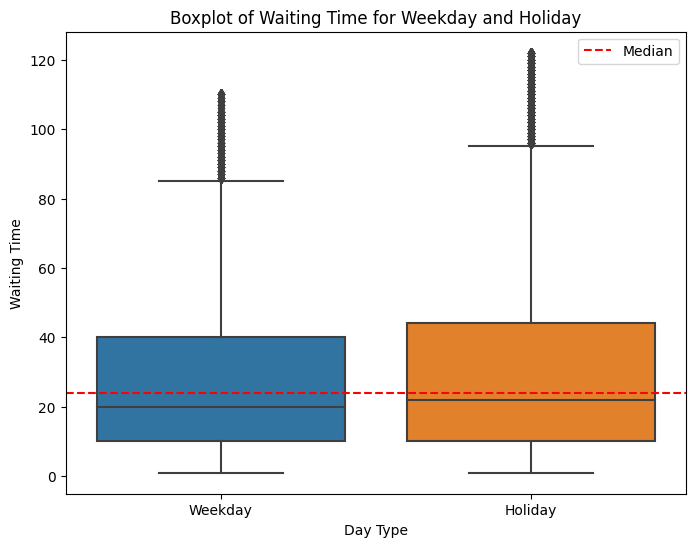

In [ ]:
# Clean up outliers
import numpy as np
def remove_outliers(data):
    quartiles = np.percentile(data, [25, 75])
    IQR = quartiles[1] - quartiles[0]
    lower_limit = quartiles[0] - 1.5 * IQR
    upper_limit = quartiles[1] + 1.5 * IQR
    return data[(data >= lower_limit) & (data <= upper_limit)]

cleaned_workday_data = remove_outliers(holiday_data)
cleaned_holiday_data = remove_outliers(working_day_data)

# Create a new dataframe for cleaned data
cleaned_data = pd.DataFrame({
    'day_type': ['Weekday'] * len(cleaned_workday_data) + ['Holiday'] * len(cleaned_holiday_data),
    'WAITTIME': list(cleaned_workday_data) + list(cleaned_holiday_data)
})

# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='day_type', y='WAITTIME', data=cleaned_data)
plt.title('Boxplot of Waiting Time for Weekday and Holiday')
plt.xlabel('Day Type')
plt.ylabel('Waiting Time')
plt.axhline(y=df['WAITTIME'].median(), color='r', linestyle='--', label='Median')
plt.legend()
plt.show()

In [ ]:
# The results of the table show that the waiting time during holidays has decreased compared to working days.

#Question 3: Discover the five most important numeric variables and the five most important categorical variables that can predict how long a patient will wait.

Best alpha: 0.17
[ 0.68046547  0.68117521 -0.7986527  -0.65874973 -0.          0.34850304
  1.56141918 -0.635902    1.18568308 -1.43297068  0.13849301  0.85636993
 -1.98430613 -0.78503453 -0.10905616 -0.3458768   4.05135524  0.19651722
  1.15611245 -0.86317324 -0.58405285 -2.06811359 -0.49678563 -0.67255883
  1.44711943 -1.56401431 -0.00971379 -0.57054966  0.74995651  2.03262524
 -2.02939765 -0.7487841  -2.27936772 -0.71459631 -1.43991172  0.
 -1.54553499]

 Feature Importance:

       Feature  Importance
16   RACERETH    4.051355
32       NOFU    2.279368
21     INTENT    2.068114
29      EDHIV    2.032625
30       PROC    2.029398
12     VMONTH    1.984306
25       COPD    1.564014
6   PAINSCALE    1.561419
36     OBSDIS    1.545535
24      CEBVD    1.447119
34    TRANOTH    1.439912
9     TOTPROC    1.432971
8     TOTDIAG    1.185683
18     IMMEDR    1.156112
19     SEEN72    0.863173
11     NUMDIS    0.856370
2       PULSE    0.798653
13      VDAYR    0.785035
28   DIABETES    0.74

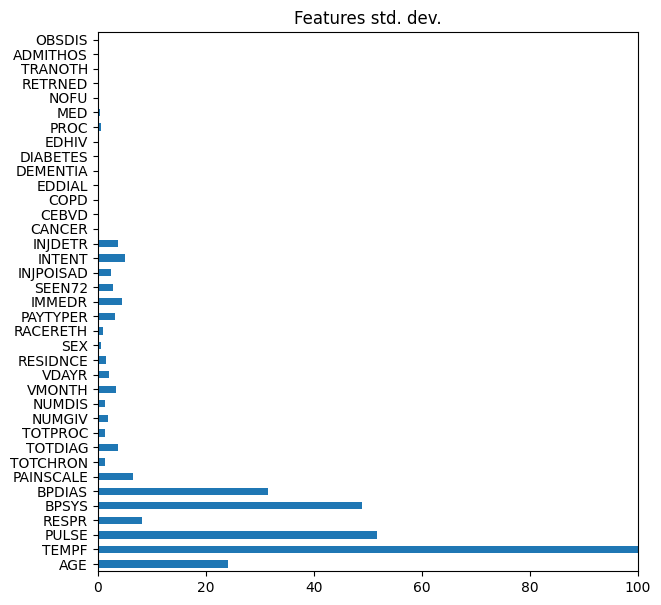

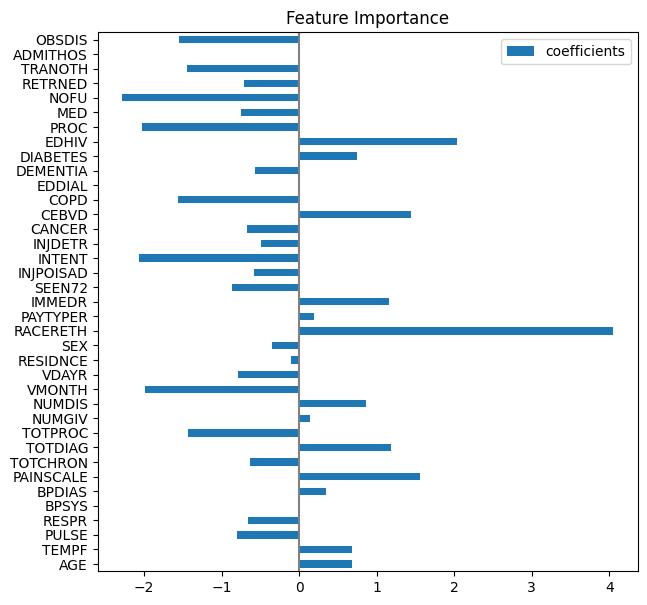

In [ ]:
# Loading the libraries
import pandas as pd
import numpy as np
from numpy import arange

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, RepeatedKFold

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split


# Loading the dataset
ed2013 = pd.read_stata('https://ftp.cdc.gov/pub/health_statistics/nchs/dataset_documentation/nhamcs/stata/ED2013-stata.dta', convert_categoricals=False, convert_missing=True)

df = pd.DataFrame(ed2013)


# Data Cleaning
# Remove rows with negative WAITTIME values
df = df[df['WAITTIME'] >= 0]


# Selecting numerical and categorical variables to consider, total 37 variables.
col_F = ['WAITTIME','AGE','TEMPF','PULSE','RESPR','BPSYS','BPDIAS','PAINSCALE','TOTCHRON','TOTDIAG','TOTPROC','NUMGIV','NUMDIS','VMONTH', 'VDAYR', 'RESIDNCE','SEX','RACERETH','PAYTYPER','IMMEDR','SEEN72','INJPOISAD','INTENT','INJDETR','CANCER','CEBVD','COPD','EDDIAL','DEMENTIA','DIABETES','EDHIV','PROC','MED','NOFU','RETRNED','TRANOTH','ADMITHOS','OBSDIS']

ed2013_F = df[col_F]


# Segregating the Feature and Target
X = ed2013_F.drop("WAITTIME", axis=1).values
y = ed2013_F["WAITTIME"].values

df_X= ed2013_F.drop("WAITTIME", axis=1)

# Compare the standard deviations of different features
df_X.std(axis=0).plot(kind="barh", figsize=(9, 7))
plt.title("Features std. dev.")
plt.subplots_adjust(left=0.3)
plt.xlim((0, 100))


# Feature Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Define the model
model = Lasso()

# Tuning Hyperparameter using GridSearchCV & RepeatedKFold

# Use GridSearchCV to search for the best alpha value
# Define grid
grid = dict()
grid['alpha'] = arange(0, 1, 0.01)

# Use RepeatedKFold for cross-validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define search and model evaluation method
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Perform the search
results = search.fit(X_scaled, y)

# Extract the best model and print the best alpha
best_lasso_model = search.best_estimator_
best_alpha = search.best_params_['alpha']

print(f"Best alpha: {best_alpha}")
print(best_lasso_model.coef_)

# Plot the Coefficients: understand the feature importance
coefs = pd.DataFrame(
    best_lasso_model.coef_, columns=["coefficients"], index=df_X.columns
)

coefs.plot(kind="barh", figsize=(9, 7))
plt.title("Feature Importance")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)


# Get feature importance (absolute values of coefficients)
feature_importance = np.abs(best_lasso_model.coef_)

feature_names = df_X.columns

# Combine feature names and their importance scores
feature_importance_df = pd.DataFrame(
    {'Feature': feature_names, 'Importance': feature_importance}
)

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print( "\n","Feature Importance:")
print("\n", feature_importance_df)